# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 1</p>
## <p style="text-align: center;">Total points: 55</p>
## <p style="text-align: center;">Due: Wednesday, Sep 8 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

***

# Team Members

- ## Rohitashwa Chakraborty _(rc47878)_
- ## Sahitya Sundar Raj Vijayanagar _(sv25849)_


In [1]:
%matplotlib inline

# Question 1: MLOps (10 pts)
Read this [article](https://towardsdatascience.com/what-is-mlops-everything-you-must-know-to-get-started-523f2d0b8bd8) "What is MLOps — Everything You Must Know to Get Started", which gives a quick walkthrough of the machine learning development lifecycle and explains how MLOps come into play, or watch this [video](https://www.youtube.com/watch?v=06-AZXmwHjo) which you may find interesting.

## 1. (**4 pts**) Use your own words to describe what MLOps is, and what challenges MLOps address. Limit your answer to one paragraph

### **Answer 1**

MLOps is an engineering discipline that focuses on the _unification_, _standardisation_ and _streamlining_ of Machine Learning or Deep Learning systems. The primary aim is to facilitate continuous development and deployment of high-performing models in production environments _(i.e: MLOps is the intersection of Data Science and DevOps)_. As Machine Learning solutions become increasingly ubiqutous, so do the technical challenges of maintaining these systems. A typical ML solution lifecycle requires several cross-functional teams to work in tandem:

- **Business development or Product team** — _defining business objective with KPIs_
- **Data Engineering** — _data acquisition and preparation_
- **Data Science** — _architecting ML solutions and developing models_
- **IT / DevOps** — _complete deployment setup, monitoring alongside scientists_

Major challenges and bottlenecks that MLOps seeks to resolve are:

- Shortage of Data Scientists who are good at developing and deploying scalable web applications
- Reflect changing business objectives in the model
- Communicate between the Technical and Functional teams
- Risk assessment

## 2. (**6 pts**) Describe what the main phases in MLOps are. Your answer should be 2-3 paragraphs

### **Answer 2**

The MLOps cycle has been divided into 7 key phases. To begin with, the **problem statement is formulated** by the business experts and Product Managers based on a business objective. After defining the objective, we translate it to an ML problem. Next, the ML model relies on **finding data** from credible sources, check compliances, frequency of change in data i.e. static or real-time data, identifying cloud services, and deciding on the data pipeline that can be used for the model training and optimization after deployment.

Following the previous steps, the data engineering team works on **data extraction** from various sources and **data preparation** steps like feature engineering (identifying features that would go into the model), and data cleaning. In order to make the process more structured and feed clean data to the next step of the model development, the **data pipeline** is designed and coded. This would require a careful selection of cloud services and cloud architectures that are compatible with each other and fit well with the data requirement. With this, the next stage, i.e, **Model Building**, wherein data scientists use the cleaned data to train models iteratively and implement quantitative checks like error, accuracy, precision, recall, etc. and qualitative measures like R-square to narrow down the model that performs better. Other tasks at this stage would be using versioning for reproducibility, check performance with baseline models, and model scaling across distributed systems.

**Building and automating pipelines** based on system requirements is integral. This would mean selection of appropriate cloud solutions, building and training the pipelines, auditing the pipelines, and validating the data. Once this stage has been completed, the pipeline is ready to be deployed, and this can be done in two ways. In **static deployment**, the model is packaged into an application software and deployed, whereas, in **dynamic deployment**, a web framework like FastAPI is used to deploy the pipeline and the user requests are sent to an API endpoint for servicing. Finally, it is crucial that organizations keep the model performance in check and **monitor** it to ensure that the model meets governance standards of all stakeholders. Here, both DevOps and Data Scientists are required to keep track and **maintain** the model, run logging to track issues, troubleshoot any failures, and **optimize models** for better performance.

***


# Question 2: Applications of Machine Learning (5 pts)

Read this [article](https://builtin.com/data-science/data-science-applications-examples) "17 Data Science Applications & Examples" and pick one of the data science systems used by various organizations according to this blog.

For this system you have chosen, answer the following questions. Please limit your answer to one paragraph:

## 1. What kind of machine learning problem is involved (e.g. classification, regression, clustering, outlier detection,...) in this system?

The UberEats delivery service works on a machine learning problem to predict how different factors would impact delivery times to their customers. This would be a **_regression_** algorithm where the target variable would be delivery times and the independent variables could be factors like traffic, restaurant location, delivery location, time of order, etc. Apart from just predicting delivery times, UberEats, being a food delivery service, also uses **_recommender systems_** to recommend cuisines and restaurants to their users. Another way in which machine learning can be used in UberEats would be to **_cluster_** users into different classes based on their usage for marketing and promotional purposes.

## 2. Speculate on what kind of data may be needed and how the results can be useful to the organization

In general, data about **_customers_** (name, age, gender, location, frequency of ordering, customer rating, favorite cuisine, most frequent restaurant, etc.), **_restaurants_**(location, cuisine, rating, menu, pricing), and **_delivery agents_**(name, rating, orders fulfilled) would be useful. For the purpose of estimating delivery times, **_User location details_**, **_Delivery agent location details_**, ***restaurant location details***, ***Traffic data***, ***Order timestamp*** would be helpful. Apart from just estimating delivery times, this would also enable the model to identify best routes between source and destination. In order for marketing and promotional purposes, customer data like ***favorite cuisine***, ***restaurant***, ***customer rating***, ***age***, ***frequency of ordering***, etc. would be most useful. Based on this information, UberEats can decide on how best to promote the product to a customer. Finally, for recommendation systems, order history details need to be tracked. This essentially means tracking details of every order (restaurant, cuisine, order date, order timestamp, delivery rating). Using feedback data for orders, sentiment analysis can be done to tune the rating of a restaurant.

## 3. What do you think are the ethical implications of using machine learning in a domain like this?

While using UberEats is the more convenient option for customers, ethically, there are a couple of concerns associated with the service. In the past, traditional restaurants, that benefited from having customers physically eat at the restaurant profited from their visit, wherein the entire revenue from the order went to the restaurant. However, with the popularity of UberEats, around 30% of the revenue goes to UberEats, that puts the restaurants and all its employees at a disadvantage. In the fear of losing out on customers in a competing market, restaurants do not have a choice but to go ahead and use these services. While ML models work on making things optimal, it does not take into consideration, the issues faced by drivers. Drivers tend to be incentivised less as the model would predict that they would drive long hours regardless, which affects the happiness quotient of drivers. Additionally, in order to meet the weekly target, drivers may tend to work overtime, affecting their health. Adding to all of this is the low pay that they receive. ML algorithms do not take into consideration underlying costs faced by drivers and does not include their feedback in designing algorithms. Hence, it is important to consider all stakeholders while designing the algorithm.
***


# Question 3: Simpson's Paradox (10 pts)

A data scientist should be careful about drawing unwarranted conclusions about any data that is presented. One of the 'gotchas' that can happen even in apparently very simple tabular summaries, is called Simpson's paradox.

Read this [article](https://www.covid-datascience.com/post/israeli-data-how-can-efficacy-vs-severe-disease-be-strong-when-60-of-hospitalized-are-vaccinated), which explains why the computed efficacy of the Pfizer vaccine is misleadingly low (67.5%) when you lump all people together, but once you stratify people by age (which is the right thing to do), you get much higher efficacy numbers.

## 1.(**5 pts**) Explain in your own words what Simpson's paradox is, and how this 'paradox' can happen in real data

## 2.(**5 pts**) Find and mention another example of Simpson's paradox (but not any of the 3 examples given in the Wikipedia entry for 'Simpson's paradox'), state why the paradox appeared in your chosen example. Also give a reference (URL) to your source for the chosen example

### References

#### [California State Department of Developmental Services - 2014 Funding Allocation Dataset](https://www.kaggle.com/wduckett/californiaddsexpenditures)

#### [Data Analysis Notebook](https://www.kaggle.com/captnemo/simpsons-paradox)

### Analysis

Here we will be analysing the Simpson's paradox in the California State DSS spending for the year 2014.
Upon aggregating the department's spending at an ethnicity level, we observe there exists a huge disparity between **_White not Hispanic_** and **_Hispanic_** communities.


***


# Question 4: Ridge and Lasso Regression (30 pts)

Download the dataset **Admission.csv** from Canvas and use the following codes to import the Admission dataset in Python. 

There are 7 features in the dataset:

1. GRE score
2. TOEFL score
3. University Rating
4. SOP(Statement of Purpose)
5. LOR(Letter of Recommendation)
6. CGPA
7. Research

And the target is **Chance of Admission**.

In [2]:
# # Only use this code block if you are using Google Colab.
# # If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

# # It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
# # Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [3]:
# Codes below will work for both Google Colab and Jupyter Notebook.
import numpy as np
import pandas as pd
import random
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression

## Load the dataset into pandas DataFrame
df = pd.read_csv('Admission.csv', index_col=0)
df = df.replace([np.inf, -np.inf], np.nan) # 
df = df.fillna(0) # Replace all the NaN values with 0

In [4]:
df.columns # Show you all the columns in this file

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [5]:
df.head() # Show you the first 5 rows in this file

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
y = df['Chance_of_Admit'] # The column named Chance_of_Admit is used as the target, and we store it in y
X = df.drop(['Chance_of_Admit'], axis=1) # We keep the remaining columns as the features, and store them in x

***

## 1

(**2 pts**) Split the data into a training set(75% of data) and a test set(25% of data), using the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function with random_state = 50. Then scale the data (not including target) so that each of the independent variables would have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this. Print the first 5 rows of the training set after scaling.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
print("Size of Original data: ",y.shape[0])
print("Size of Test data (25%): ",y_test.shape[0])
print("Size of Training data (75%): ",y_train.shape[0])

Size of Original data:  400
Size of Test data (25%):  100
Size of Training data (75%):  300


In [8]:
from sklearn.preprocessing import scale
X_train_tr = scale(X_train)
X_test_tr = scale(X_test)
X_train_tr[0:5]

array([[ 1.52725374,  2.0917706 ,  1.61594354,  0.63150829,  1.72829095,
         2.11370277,  0.90453403],
       [ 0.74180896,  0.46308859, -0.9310778 , -0.35266047, -1.04140609,
         0.29488827,  0.90453403],
       [ 0.56726568,  0.13735218,  1.61594354,  0.63150829,  0.62041214,
         0.26211684,  0.90453403],
       [-0.39272239, -0.51412062, -0.08207069,  0.13942391,  0.62041214,
        -0.80295471, -1.1055416 ],
       [ 0.47999403,  0.78882499,  0.76693642,  1.12359267,  1.17435154,
         1.11417408,  0.90453403]])

***

## 2

(**5 pts**) Use [sklearn.linear_model.Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) and [sklearn.linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) classes to do a **5-fold** cross validation using sklearn's KFold. For the sweep of the regularization parameter, we will look at a grid of values ranging from α=10^10 to α=10^−6. In Python, you can consider this range of values as follows: alpha = 10**numpy.linspace(6,-6,100) 
so that you can generate 100 uniform values between -6 to 6 as power series.

Fit the 2 regression models with scaled data and report the best chosen **α** based on cross validation as well as the corresponding scoring metric. The cross validation should happen on your training data using **MSE** as the scoring metric.


In [9]:
from sklearn.model_selection import KFold

alpha_list = 10**np.linspace(10,-6,100)

# Lasso Regression

cv = []

for alpha in alpha_list:
    cv_error = []
    for train_index, test_index in KFold(n_splits=5).split(X_train_tr):
        lmdl = linear_model.Lasso(alpha= alpha)
        lmdl.fit(X_train_tr[train_index],y_train.iloc[train_index])
        lmdl_preds = lmdl.predict(X_train_tr[test_index])
        cv_error.append(mean_squared_error(lmdl_preds, y_train.iloc[test_index]))
    cv.append(np.mean(cv_error))
    
cv = pd.DataFrame(cv, index=alpha_list, columns=["MSE"])
lasso_alpha = cv["MSE"].idxmin()
lasso_error = cv.loc[lasso_alpha]["MSE"]
print("Lasso Regression Cross-Validation:\n\toptimal \u03B1 = {alpha}\n\tMSE: {mse}".format(alpha = lasso_alpha, mse = lasso_error))

Lasso Regression Cross-Validation:
	optimal α = 0.0011768119524349942
	MSE: 0.0040987203449797975


In [10]:
# Ridge Regression

cv = []

for alpha in alpha_list:
    cv_error = []
    for train_index, test_index in KFold(n_splits=5).split(X_train_tr):
        rmdl = linear_model.Ridge(alpha= alpha)
        rmdl.fit(X_train_tr[train_index],y_train.iloc[train_index])
        rmdl_preds = rmdl.predict(X_train_tr[test_index])
        cv_error.append(mean_squared_error(rmdl_preds, y_train.iloc[test_index]))
    # cv.append(cv_error)
    cv.append(np.mean(cv_error))
    
cv = pd.DataFrame(cv, index=alpha_list, columns=["MSE"])
ridge_alpha = cv["MSE"].idxmin()
ridge_error = cv.loc[ridge_alpha]["MSE"]
print("Ridge Regression Cross-Validation:\n\toptimal \u03B1 = {alpha}\n\tMSE: {mse}".format(alpha = ridge_alpha, mse = ridge_error))

Ridge Regression Cross-Validation:
	optimal α = 4.229242874389499
	MSE: 0.004118067661937137


***

## 3

(**5 pts**) Run ridge and lasso regression for all of the **α** specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; different features' weights of each model should be on the same plot with different colors (3pts). 

What do you qualitatively observe when the value of the regularization parameter changes (2pts)?


In [11]:
lasso_coeffs = pd.DataFrame(columns=X_train.columns, index=alpha_list)

for alpha in alpha_list:
    lmdl = linear_model.Lasso(alpha= alpha)
    lmdl.fit(X_train_tr,y_train)
    lasso_coeffs.loc[alpha] = lmdl.coef_

In [12]:
ridge_coeffs = pd.DataFrame(columns=X_train.columns, index=alpha_list)

for alpha in alpha_list:
    rmdl = linear_model.Ridge(alpha= alpha)
    rmdl.fit(X_train_tr,y_train)
    ridge_coeffs.loc[alpha] = rmdl.coef_

Text(0.5, 0.98, 'Comparasion between Lasso and Ridge coefficients')

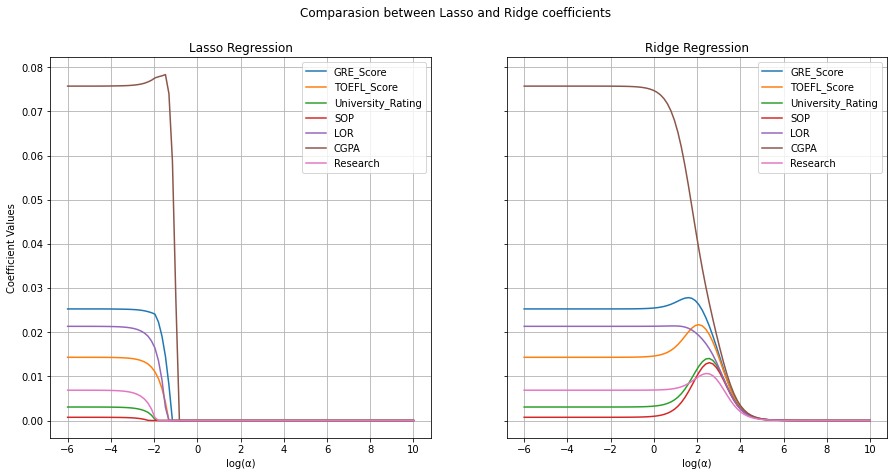

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, sharey=True, sharex=True)
fig.set_size_inches(15, 7,  forward=True)

ax[0].plot(np.log10(alpha_list),lasso_coeffs, label = lasso_coeffs.columns)
ax[0].set_ylabel("Coefficient Values")
ax[0].set_xlabel("log(\u03B1)")
ax[0].set_title("Lasso Regression")
ax[0].set_label(lasso_coeffs.columns)
ax[0].grid(True)
ax[0].legend()

ax[1].plot(np.log10(alpha_list),ridge_coeffs, label = ridge_coeffs.columns)
# ax[1].set_ylabel("Coefficient Values")
ax[1].set_xlabel("log(\u03B1)")
ax[1].set_title("Ridge Regression")
ax[1].grid(True)
ax[1].legend()

fig.suptitle("Comparasion between Lasso and Ridge coefficients")

For **LASSO REGRESSION**, as the $\alpha$ value increases, i.e: the regularisation parameter increases, the value of the coefficients is set to **Zero**. Thus, We observe the curves dropping sharply to 0

For **RIDGE REGRESSION** however, as the $\alpha$ value  increases, the value of the coefficients gradually approach **ZERO**. this is evident by the much smoother curves in Ridge. One surprising feature in ridge regression is that the coefficient values seem to increase first (around $log_{10}(\alpha) \in (0,3) $) and then drops sharply to zero (around $log_{10}(\alpha) \in (3,6) $)


***

## 4

(**3 pts**) Take the exponential of Y_train as the target, and fit the 2 regression models again. Report the best chosen **α** based on cross validation as well as the corresponding scoring metric. Compare the results of using the original target with the results of using the exponential of the target. What do you observe? 

In [14]:
# Lasso Regression

cv = []

for alpha in alpha_list:
    cv_error = []
    for train_index, test_index in KFold().split(X_train_tr):
        lmdl = linear_model.Lasso(alpha= alpha)
        lmdl.fit(X_train_tr[train_index],np.exp(y_train.iloc[train_index]))
        lmdl_preds = lmdl.predict(X_train_tr[test_index])
        cv_error.append(mean_squared_error(lmdl_preds, np.exp(y_train.iloc[test_index])))
    # cv.append(cv_error)
    cv.append(np.mean(cv_error))
    
cv = pd.DataFrame(cv, index=alpha_list, columns=["MSE"])
exp_lasso_alpha = cv["MSE"].idxmin()
exp_lasso_error = cv.loc[exp_lasso_alpha]["MSE"]
print("Lasso Regression Cross-Validation:\n\toptimal \u03B1 = {alpha}\n\tMSE: {mse}".format(alpha = exp_lasso_alpha, mse = exp_lasso_error))

Lasso Regression Cross-Validation:
	optimal α = 0.0017073526474706887
	MSE: 0.014766582720990707


In [15]:
# Ridge Regression

cv = []

for alpha in alpha_list:
    cv_error = []
    for train_index, test_index in KFold().split(X_train_tr):
        rmdl = linear_model.Ridge(alpha= alpha)
        rmdl.fit(X_train_tr[train_index],np.exp(y_train.iloc[train_index]))
        rmdl_preds = rmdl.predict(X_train_tr[test_index])
        cv_error.append(mean_squared_error(rmdl_preds, np.exp(y_train.iloc[test_index])))
    # cv.append(cv_error)
    cv.append(np.mean(cv_error))
    
cv = pd.DataFrame(cv, index=alpha_list, columns=["MSE"])
exp_ridge_alpha = cv["MSE"].idxmin()
exp_ridge_error = cv.loc[exp_ridge_alpha]["MSE"]
print("Ridge Regression Cross-Validation:\n\toptimal \u03B1 = {alpha}\n\tMSE: {mse}".format(alpha = exp_ridge_alpha, mse = exp_ridge_error))

Ridge Regression Cross-Validation:
	optimal α = 6.135907273413163
	MSE: 0.014815008775351055


Upon training our models against $e^{y\_train}$ the MSE of the optimal model increases. This is because the $\sigma_{e^{y\_train}}$ _(variance)_ and the $\mu_{e^{y\_train}}$ _(mean)_ also increases when y_train is exponentiated.

The Optimal $\alpha$ for both Lasso and Ridge Regression increases too.


***

## 5

(**5 pts**) Similarly, use [sklearn.linear_model.ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) to do linear regression with different **α** values, and plot the coefficients learned for each of them (2pts). Observe the plot, then explain the pros and cons of ridge, lasso and Elastic Net models (3pts)

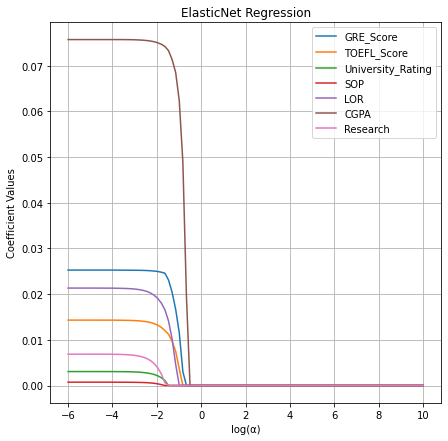

In [16]:
elastic_coeffs = pd.DataFrame(columns=X_train.columns, index=alpha_list)

for alpha in alpha_list:
    enet_mdl = linear_model.ElasticNet(alpha= alpha)
    enet_mdl.fit(X_train_tr,y_train)
    elastic_coeffs.loc[alpha] = enet_mdl.coef_

fig, ax = plt.subplots()
fig.set_size_inches(7, 7,  forward=True)

ax.plot(np.log10(alpha_list),elastic_coeffs, label = elastic_coeffs.columns)
ax.set_ylabel("Coefficient Values")
ax.set_xlabel("log(\u03B1)")
ax.set_title("ElasticNet Regression")
ax.grid(True)
ax.legend()

## Lasso Regression

- Acronym for *Least Absolute Shrinkage Selector Operator*
- Lasso assigns a penalty _(Loss Function)_ equal to the MSE + the absolute sum of all coefficients:
$$L = \sum_i(\hat{Y_i} - Y_i)^2 + \alpha\sum_i|\beta_i|$$

### **Pros**

- Assigns ZERO weight to coefficients, thereby reducing model complexity and preventing model overfitting
- Faster Convergence

### **Cons**

- Increases Bias in a model
- Cannot deal with Multicolineraity _(or, correlated dependent variables)_

## Ridge Regression

- Similar to Lasso, but assigns squared magnitude of the coefficients to the loss function
$$L = \sum_i(\hat{Y_i} - Y_i)^2 + \alpha\sum_i(\beta_i)^2$$

### **Pros**

- More Versatile than Lasso
- Does not randomly discard variables by setting them to Zero.

### **Cons**

- Models more difficult to interpret
- Does not set feature coefficients to Zero, thereby retaining insignificant features and increasing complexity and variance of the model.

## ElasticNet

- Middle ground between Lasso and ridge regression.
- Loss function includes both the absolute sum and squared sum of coefficients.
$$L = \sum_i(\hat{Y_i} - Y_i)^2 + \alpha\sum_i|\beta_i| + \alpha\sum_i(\beta_i)^2$$

### **Pros**

- Faster Convergence than Ridge Regression
- Prevents the model from overfitting by eliminating irrelevant features
- Reduces impact of features not affecting the target variable (instead of stting them to 0)

### **Cons**

- Loss Function more complex
- Computationally intensive as compared to Lasso and Ridge Regression


***

## 6

(**5 pts**) Run the following three regression models with **MSE** loss on the training data: 

a. linear regression without regularization (1pts)

b. linear regression with ridge regularization (2pts)

c. linear regression with lasso regularization (2pts)

For part (b) and (c), use only the best regularization parameters. Report the MSE and R<sup>2</sup> on the test data for each model.

In [17]:
from sklearn.metrics import r2_score

# Linear Regression without Regularisation
lm = linear_model.LinearRegression()
lm.fit(X_train_tr,y_train)
pred = lm.predict(X_test_tr)
lm_mse = mean_squared_error(pred, y_test)
lm_r2 = r2_score(y_test, pred)

print("Metrics - Linear Regression (No Regularisation):")
print("\tMSE:", lm_mse)
print("\tR\u00b2:", lm_r2)

# Lasso Regression
lasso_mdl = linear_model.Lasso(alpha=lasso_alpha)
lasso_mdl.fit(X_train_tr,y_train)
pred = lasso_mdl.predict(X_test_tr)
lasso_mse = mean_squared_error(pred, y_test)
lasso_r2 = r2_score(y_test, pred)


print("\nMetrics - Lasso Regression (\u03B1 = {alp}):".format(alp = lasso_alpha.round(5)))
print("\tMSE:", lasso_mse)
print("\tR\u00b2:", lasso_r2)

# Ridge Regression
ridge_mdl = linear_model.Ridge(alpha=ridge_alpha)
ridge_mdl.fit(X_train_tr,y_train)
pred = ridge_mdl.predict(X_test_tr)
ridge_mse = mean_squared_error(pred, y_test)
ridge_r2 = r2_score(y_test, pred)


print("\nMetrics - Ridge Regression (\u03B1 = {alp}):".format(alp = ridge_alpha.round(2)))
print("\tMSE:", ridge_mse)
print("\tR\u00b2:", ridge_r2)


Metrics - Linear Regression (No Regularisation):
	MSE: 0.005200215496311308
	R²: 0.6910288907914793

Metrics - Lasso Regression (α = 0.00118):
	MSE: 0.005166967497632441
	R²: 0.6930043225861924

Metrics - Ridge Regression (α = 4.23):
	MSE: 0.005150074618331437
	R²: 0.6940080140022614


***

## 7

(**5 pts**) Train the 3 models and report the metrics with the original data without scaling (3pts). 

Why do we need to scale the data before regularization (2pts)? 

## Answer:


In [18]:
from sklearn.metrics import r2_score

# Linear Regression without Regularisation
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
pred = lm.predict(X_test)
lm_mse = mean_squared_error(pred, y_test)
lm_r2 = r2_score(y_test, pred)

print("Metrics - Linear Regression (No Regularisation):")
print("\tMSE:", lm_mse)
print("\tR\u00b2:", lm_r2)

# Lasso Regression
lasso_mdl = linear_model.Lasso(alpha=lasso_alpha)
lasso_mdl.fit(X_train,y_train)
pred = lasso_mdl.predict(X_test)
lasso_mse = mean_squared_error(pred, y_test)
lasso_r2 = r2_score(y_test, pred)


print("\nMetrics - Lasso Regression (\u03B1 = {alp}):".format(alp = lasso_alpha.round(5)))
print("\tMSE:", lasso_mse)
print("\tR\u00b2:", lasso_r2)

# Ridge Regression
ridge_mdl = linear_model.Ridge(alpha=ridge_alpha)
ridge_mdl.fit(X_train,y_train)
pred = ridge_mdl.predict(X_test)
ridge_mse = mean_squared_error(pred, y_test)
ridge_r2 = r2_score(y_test, pred)


print("\nMetrics - Ridge Regression (\u03B1 = {alp}):".format(alp = ridge_alpha.round(2)))
print("\tMSE:", ridge_mse)
print("\tR\u00b2:", ridge_r2)


Metrics - Linear Regression (No Regularisation):
	MSE: 0.004526319242200032
	R²: 0.731068476318641

Metrics - Lasso Regression (α = 0.00118):
	MSE: 0.0045887971849548435
	R²: 0.7273563456794947

Metrics - Ridge Regression (α = 4.23):
	MSE: 0.004518216577828435
	R²: 0.7315498965982838


## Why do we need to scale the data?

The primary objective of scaling variables before regularisation is to ensure that the $\alpha$ term regularises/affects each term/column/feature equally. 

For ex. Suppose we have the weights(in grams) and the age of individuals. The age will be in the order of $10^1$ while the weight will be in the order of $10^4$. Applying OLS with regularisation on this dataset will skew the model coefficients towards either of the features. The output of this dataset would be irrelevant because it would not take into account the true relationship between weights and age (owing to the huge disparity in the range and order).

Scaling the data however, will normalise the values (say to a standard normal). Now both weight and age will range from -1 to 1 and will be centered around 0 (if standard normal scaling was implemented). This scaled dataset will now allow the regularisation term $(\alpha)$ to "push-down" coefficient values more evenly, thereby allowing Regression algorithm to work efficiently and converge to the optimal solution.

***
***
